In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.datasets import load_boston

In [19]:
tips = sns.load_dataset('tips')
tips

#Men tips data
men = tips[tips["sex"] == "Male"]["tip"]


#Female tips data
female = tips[tips["sex"] == "Female"]["tip"]

#### male tips

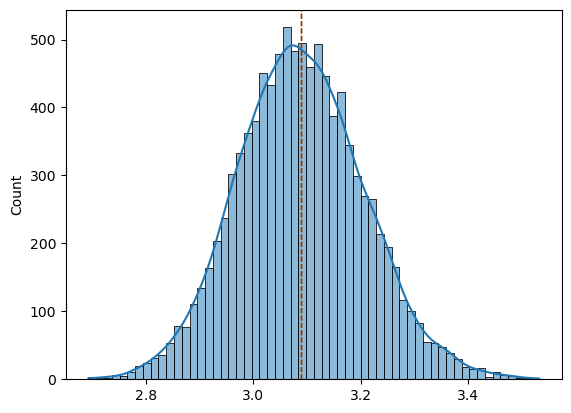

In [23]:

# Traditional bootstrap for men tips
n_samples = 10000

bootstrap_means = np.array([men.sample(len(men), replace= True).mean() for _ in range(n_samples)])


# Plot histogram
sns.histplot(bootstrap_means, kde=True)
plt.axvline(men.mean(), color="green", linestyle="--", linewidth=1)
plt.axvline(bootstrap_means.mean(), color="red", linestyle="--", linewidth=1)
plt.show()


In [24]:
# Bootstrap percentile interval
def percentile_interval(bootstrap_dist, loc=0.9):
    lower_limit = np.percentile(bootstrap_dist, (1 - loc) * 50)
    upper_limit = np.percentile(bootstrap_dist, 100 - (1 - loc) * 50)
    return lower_limit, upper_limit

In [25]:
print(percentile_interval(bootstrap_means, loc=0.9))

(2.9006337579617845, 3.2855445859872607)


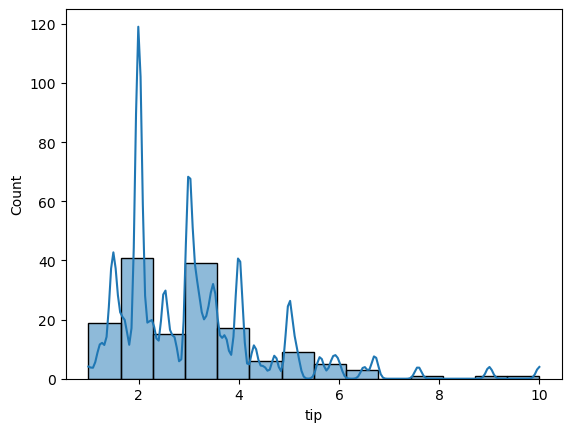

In [28]:
# Kernel density estimate
sns.histplot(men, kde=True, kde_kws={"bw_adjust": men.std() / np.sqrt(len(men))})
plt.show()


#### female tips

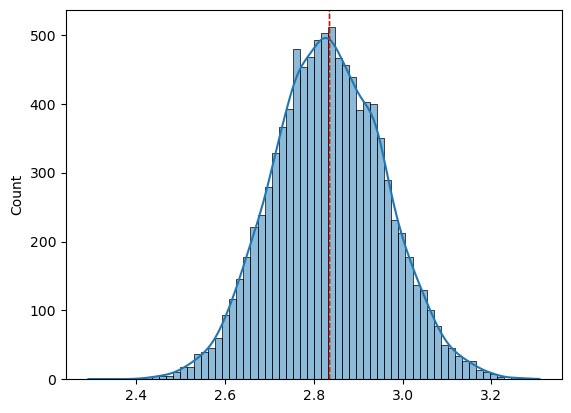

In [40]:

# Traditional bootstrap for female tips
n_samples = 10000

bootstrap_means_female = np.array([female.sample(len(female), replace= True).mean() for _ in range(n_samples)])


# Plot histogram
sns.histplot(bootstrap_means_female, kde=True)
plt.axvline(female.mean(), color="green", linestyle="--", linewidth=1)
plt.axvline(bootstrap_means_female.mean(), color="red", linestyle="--", linewidth=1)
plt.show()

In [47]:
print(percentile_interval(bootstrap_means_female, loc=0.9))

(2.6304597701149417, 3.0418505747126434)


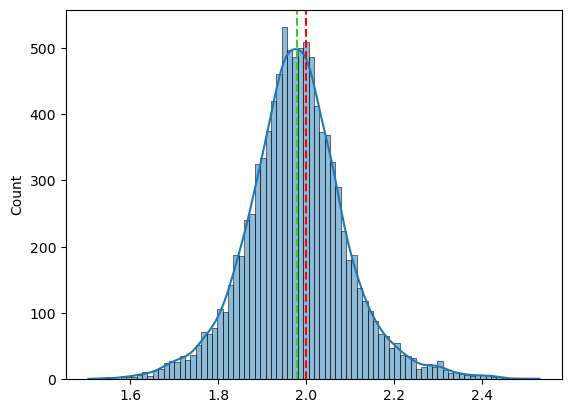

In [46]:
# Smoothed bootstrap for female tips
smoothed_bootstrap_q1 = []
for _ in range(n_samples):
    bootstrap_sample = female.sample(len(female), replace=True)
    random_noise = np.random.normal(loc=0, scale=female.std() / np.sqrt(len(female)), size=len(female))
    smoothed_bootstrap_q1.append(first_quartile(bootstrap_sample + random_noise))
smoothed_bootstrap_q1 = np.array(smoothed_bootstrap_q1)

# Plot histogram
sns.histplot(smoothed_bootstrap_q1,kde=True)
plt.axvline(first_quartile(female), color="red", linestyle="--", linewidth=1.5)
plt.axvline(smoothed_bootstrap_q1.mean(), color="limegreen", linestyle="--", linewidth=1.5)
plt.show()

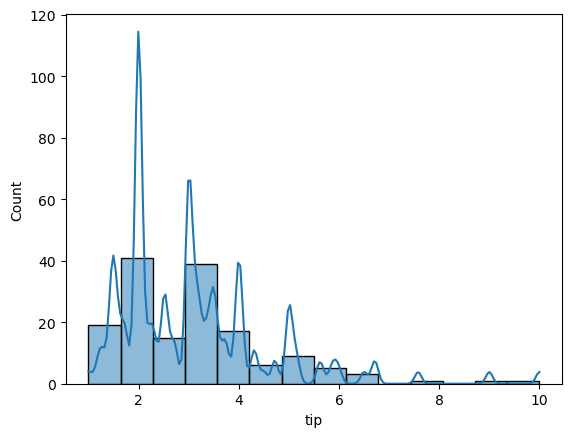

In [48]:
# Kernel density estimate
sns.histplot(men, kde=True, kde_kws={"bw_adjust": female.std() / np.sqrt(len(female))})
plt.show()